# Installing InstaLoader & Authentication

In [1]:
!pip install instaloader

In [2]:
# import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import datetime
# import emoji
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [17]:
# Create an instance of Instaloader class
loader = instaloader.Instaloader()

# Enter your Instagram handle and password
ACCOUNT = 'ilovesmt203'
PASSWORD = 'ilovesmt203!haha'

# Upon successful authentication, you should see a message saying Authentication OK.
# Otherwise, check your login details
try:
    loader.login(ACCOUNT, PASSWORD)
    print("Authentication OK")
except:
    print("Error during authentication")
    
# customise the parameter settings based on your download preference
# configuration 
loader = instaloader.Instaloader(download_pictures=False,
                            download_video_thumbnails=False,
                            download_videos=False,
                            download_comments=True,
                            download_geotags=True,
                            compress_json=False,
                            post_metadata_txt_pattern="")

Authentication OK


# Downloading Posts as JSON files

In [18]:
HASHTAG = "impeachtrump"

# Create a Hashtag instance from a given hashtag name
hashtag = instaloader.Hashtag.from_name(loader.context, HASHTAG)
loaded_posts = hashtag.get_all_posts()

for cnt_post, post in enumerate(loaded_posts):
    # date_created = datetime.datetime.fromtimestamp(post.date_utc)
    if datetime.datetime(2021,1,6) <= post.date_local <= datetime.datetime(2021,2,13):
        try:
            loader.download_post(post, target='#'+hashtag.name)
        except:
            print("\nError in downloading. Process halted.")



HTTP redirect from https://www.instagram.com/explore/tags/impeachtrump/ to https://www.instagram.com/accounts/login/


LoginRequiredException: Redirected to login page. Use --login.

In [3]:
mypath = "."
folder_name = '#impeachtrump'

json_path = f'{mypath}/{folder_name}'
json_path

'./#impeachtrump'

# Extracting Individual Post Information

In [4]:
def convert_json_posts_to_df(json_path):
    substring = "comment"
    json_files = [filename for filename in os.listdir(json_path) if (filename.endswith('.json') and substring not in filename)]
    post_list = []

    # iterate through the list of JSON files
    for js in json_files:
            
        # open and read each json file
        with open(os.path.join(json_path, js)) as json_file:
            json_text = json.load(json_file)
            #pprint.pprint(json.text)
            
            try:
                # extract Instagram post information
                comment_id = json_text['node']['id']
                user_id = json_text['node']['owner']['id']
                unix_timestamp = json_text['node']['taken_at_timestamp']
                date_time = datetime.datetime.fromtimestamp(unix_timestamp)
                likes_count = json_text['node']['edge_liked_by']['count']
                
                try:
                    comment = json_text['node']['accessibility_caption']
                except:
                    pass
            except:
                pass
        
        post_list.append([comment_id, user_id, date_time, likes_count, comment])
    df = pd.DataFrame(data=post_list, columns=['comment_id', 'user_id', 'date_time', 'likes_count', 'comment'])
    return df

In [5]:
import json
import datetime
import pandas as pd

# pd.set_option('display.max_colwidth', -1)
# pd.set_option('display.max_rows', None)

df1 = convert_json_posts_to_df(json_path)
df1.insert(2, 'platform', 'instagram')
df1

,comment_id,user_id,platform,date_time,likes_count,comment
0,2485115361140092383,3096242645,instagram,2021-01-13 00:27:38,569,Photo by brett kaufman in USA with @kathygriff...
1,2486144107417564404,45076909461,instagram,2021-01-14 10:31:34,43,None
2,2493835123373749797,7302369111,instagram,2021-01-25 01:12:15,5,"Photo by Joseph Saiz in Casa Grande, Arizona. ..."
3,2497089249940873219,289471423,instagram,2021-01-29 12:57:37,313,Photo by @bestdressking in 5 Star Restaurant. ...
4,2497394413521987156,45132302678,instagram,2021-01-29 23:03:55,37,"Photo by 🅰🅽·🅾🆃🅷·🅴🆁 ˈ🅻🅴🆅ə🅻 on January 29, 2021...."
5,2499509349740646973,47034870,instagram,2021-02-01 21:05:55,25,Photo shared by Marcie Farazyna on February 01...
6,2505059487094919878,42105487209,instagram,2021-02-09 12:53:03,6,Photo by The Political Student Page on Februar...
7,2505198552669696589,889937049,instagram,2021-02-09 17:29:21,0,"Photo by Le Nuage on February 09, 2021."
8,2505549950776082866,45686809407,instagram,2021-02-10 05:07:31,7,"Photo by Kelsey D. in Chicago, Illinois. May b..."
9,2505652995237250021,42105487209,instagram,2021-02-10 08:32:15,12,Photo by The Political Student Page on Februar...


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   comment_id   20 non-null     object        
 1   user_id      20 non-null     object        
 2   platform     20 non-null     object        
 3   date_time    20 non-null     datetime64[ns]
 4   likes_count  20 non-null     int64         
 5   comment      18 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.1+ KB


# Extracting Comments from each Post

In [7]:
 def convert_comments_posts_to_df(json_path):
    substring = "comment"
    json_files = [filename for filename in os.listdir(json_path) if (filename.endswith('.json') and substring in filename)]
    post_list = []

    # iterate through the list of JSON files
    for js in json_files:
            
        # open and read each json file
        with open(os.path.join(json_path, js)) as json_file:
            json_text = json.load(json_file)
            #pprint.pprint(json.text)
            
            #extract comments from comments.json files
            for comment in json_text:
                comment_id = comment['id']
                user_id = comment['owner']['id']
                date_time = datetime.datetime.fromtimestamp(comment['created_at'])
                likes_count = comment['likes_count']
                comment= comment['text']
                
                post_list.append([comment_id, user_id, date_time, likes_count, comment])

    df = pd.DataFrame(data=post_list, columns=['comment_id', 'user_id', 'date_time', 'likes_count', 'comment'])
    return df

In [8]:
import json
import datetime
import pandas as pd

# pd.set_option('display.max_colwidth', -1)
# pd.set_option('display.max_rows', None)

df2 = convert_comments_posts_to_df(json_path)
df2.insert(2, 'platform', 'instagram')
df2.head()

# df2.to_csv('')

,comment_id,user_id,platform,date_time,likes_count,comment
0,17916024808583798,3544668418,instagram,2021-02-19 00:52:00,1,Well stated!
1,17874135509220349,30746756357,instagram,2021-02-16 01:55:25,1,😂😂👏
2,17891163556905576,10563354725,instagram,2021-02-12 00:05:16,1,The hand makes it sublime
3,18126510583195827,10563354725,instagram,2021-02-12 00:04:00,1,Missed this one b4 and the band aid too. Too good
4,17912957488603721,9704226,instagram,2021-02-03 22:33:08,1,😜😜😜perfect❣️


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   comment_id   473 non-null    int64         
 1   user_id      473 non-null    object        
 2   platform     473 non-null    object        
 3   date_time    473 non-null    datetime64[ns]
 4   likes_count  473 non-null    int64         
 5   comment      473 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 22.3+ KB


In [10]:
frames = [df1, df2]
combined = pd.concat(frames)
combined.dropna(inplace=True)
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 472
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   comment_id   491 non-null    object        
 1   user_id      491 non-null    object        
 2   platform     491 non-null    object        
 3   date_time    491 non-null    datetime64[ns]
 4   likes_count  491 non-null    int64         
 5   comment      491 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 26.9+ KB


In [11]:
df = combined[combined['comment'].str.startswith("Photo by")==False]
df = df[df['comment'].str.startswith("Photo shared by")==False]
df.head()

df.to_csv('impeach_trump_comments.csv')

# Text Pre-processing

In [12]:
stopwords_list = stopwords.words('english')
stopwords_list += ['donald','trump', 'impeachment'] #additional stopwords customised based on context 

In [13]:
output1 = []
output2 = []
for text in df['comment']: 
    text = re.sub(r"(?:\@|\#|https?\://)\S+", "", str(text)) # remove hashtag mentions and urls
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE) 
    text = emoji_pattern.sub(r'', str(text)) # remove emojis
    text_tokenised = word_tokenize(text)
    text_lower = [w.lower() for w in text_tokenised]
    text_words_only = [w for w in text_lower if re.search('^[a-z]+$',w)]
    text_stopremoved = [w for w in text_words_only if w not in stopwords_list]

    # stemmer = PorterStemmer()
    # text_stemmed = [stemmer.stem(w) for w in text_stopremoved]
    # output.append(text_stemmed)
    output1.append(text_stopremoved)
    output2.append(text)

In [14]:
df['comment_no_emoji'] = output2
df['comment_processed'] = output1
df.head()

,comment_id,user_id,platform,date_time,likes_count,comment,comment_no_emoji,comment_processed
0,17916024808583798,3544668418,instagram,2021-02-19 00:52:00,1,Well stated!,Well stated!,"[well, stated]"
1,17874135509220349,30746756357,instagram,2021-02-16 01:55:25,1,😂😂👏,,[]
2,17891163556905576,10563354725,instagram,2021-02-12 00:05:16,1,The hand makes it sublime,The hand makes it sublime,"[hand, makes, sublime]"
3,18126510583195827,10563354725,instagram,2021-02-12 00:04:00,1,Missed this one b4 and the band aid too. Too good,Missed this one b4 and the band aid too. Too good,"[missed, one, band, aid, good]"
4,17912957488603721,9704226,instagram,2021-02-03 22:33:08,1,😜😜😜perfect❣️,perfect,[perfect]


# Word Clouds

In [15]:
wordcloud_words = []
for wordlist in df['comment_processed']:
    for word in wordlist:
        wordcloud_words.append(str(word))

print(wordcloud_words)

['well', 'stated', 'hand', 'makes', 'sublime', 'missed', 'one', 'band', 'aid', 'good', 'perfect', 'point', 'miss', 'hope', 'truck', 'lift', 'walk', 'ramps', 'want', 'sure', 'leave', 'behind', 'please', 'take', 'away', 'gladly', 'pay', 'extra', 'weight', 'fee', 'hahahahahahahahahaha', 'good', 'question', 'toxic', 'waste', 'thanks', 'laughter', 'nicely', 'done', 'brett', 'especially', 'appreciate', 'attention', 'detail', 'gave', 'tiny', 'perfect', 'love', 'yea', 'know', 'pretty', 'toxic', 'seriously', 'toxic', 'waste', 'great', 'brett', 'someone', 'fb', 'getting', 'ready', 'virtual', 'moving', 'party', 'moving', 'vans', 'get', 'needed', 'laugh', 'today', 'worried', 'coming', 'week', 'thanks', 'art', 'right', 'garbage', 'garbage', 'bye', 'bye', 'never', 'come', 'back', 'please', 'gold', 'thank', 'making', 'baby', 'hands', 'understand', 'upper', 'class', 'yrumpies', 'go', 'rallies', 'wear', 'paraphernalia', 'actually', 'benefit', 'tax', 'cuts', 'protection', 'law', 'suits', 'know', 'like',

In [16]:
wordcloud_string = ""
for word in wordcloud_words:
    wordcloud_string += word+" "

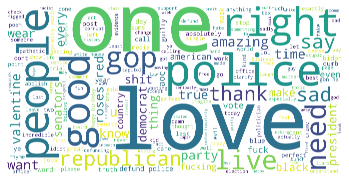

In [17]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=10000, height=5000).generate(wordcloud_string)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("impeachtrump.png")

# Sentiment Analysis
## VADER Analysis (better for short texts)

In [24]:
def vader_compound_score(sentence): 
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence) 
    return sentiment_dict['compound']

df['vader_score_emoji'] = df['comment'].apply(vader_compound_score) 
df['vader_score_no_emoji'] = df['comment_no_emoji'].apply(vader_compound_score) 
df.head()

,comment_id,user_id,platform,date_time,likes_count,comment,comment_no_emoji,comment_processed,vader_score (w emoji),vader_score (no emoji),vader_score_emoji),vader_score_emoji,vader_score_no_emoji
0,17916024808583798,3544668418,instagram,2021-02-19 00:52:00,1,Well stated!,Well stated!,"[well, stated]",0.3382,0.3382,0.3382,0.3382,0.3382
1,17874135509220349,30746756357,instagram,2021-02-16 01:55:25,1,😂😂👏,,[],0.7003,0.0000,0.7003,0.7003,0.0000
2,17891163556905576,10563354725,instagram,2021-02-12 00:05:16,1,The hand makes it sublime,The hand makes it sublime,"[hand, makes, sublime]",0.4939,0.4939,0.4939,0.4939,0.4939
3,18126510583195827,10563354725,instagram,2021-02-12 00:04:00,1,Missed this one b4 and the band aid too. Too good,Missed this one b4 and the band aid too. Too good,"[missed, one, band, aid, good]",0.1779,0.1779,0.1779,0.1779,0.1779
4,17912957488603721,9704226,instagram,2021-02-03 22:33:08,1,😜😜😜perfect❣️,perfect,[perfect],0.6369,0.5719,0.6369,0.6369,0.5719


(array([ 25.,  40.,  29.,  26.,   9., 156.,  37.,  54.,  50.,  47.]),
 array([-9.8430e-01, -7.8754e-01, -5.9078e-01, -3.9402e-01, -1.9726e-01,
        -5.0000e-04,  1.9626e-01,  3.9302e-01,  5.8978e-01,  7.8654e-01,
         9.8330e-01]),
 <BarContainer object of 10 artists>)

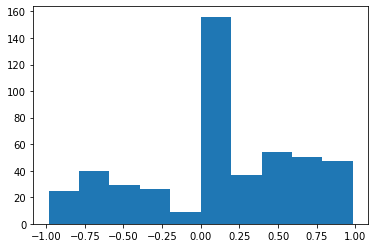

In [27]:
plt.hist(df.vader_score_emoji)

(array([ 16.,  32.,  26.,  17.,  13., 205.,  26.,  47.,  64.,  27.]),
 array([-0.9843 , -0.79155, -0.5988 , -0.40605, -0.2133 , -0.02055,
         0.1722 ,  0.36495,  0.5577 ,  0.75045,  0.9432 ]),
 <BarContainer object of 10 artists>)

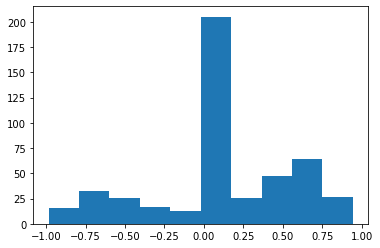

In [26]:
 plt.hist(df.vader_score_no_emoji)